---
CSC 268 Lab 0
---
This notebook serves to test the python environment to ensure that it has necessary packages.  It also goes over some basic image operations.  For this lab, you will need the following packages installed:
* `numpy`: numeric python library
* `matplotlib`: a collection of plotting functions
* `opencv`: the open computer vision library
* `PIL`: the Python image library

Additional packages you may wish to install now for use in future labs include `scipy`, `pandas`, `sympy`, `cython`, `pytorch`, and `rawpy`.  All of these packages should already be available on `jupyterlab.smith.edu`.

We begin by importing our packages.  If you see no error messages after executing the cell below, then the environment is working properly.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')
from PIL import Image

### Part one:  Loading and Displaying Images

There are multiple Python packages that deal with images.  We'll mostly use `numpy` (numeric Python) and `cv2` (the open computer vision library, or OpenCV), since these are fairly interoperable.  For display we'll use the `matplotlib` package.  Here's a bit of code showing how to read in a file and display it.  For convenience, we've defined a function that takes care of all the details for making the displayed image look good.  Note that the image is stored here as a 3D array of `uint8` (unsigned 8-bit integers, each one capable of storing a number between 0 and 255).

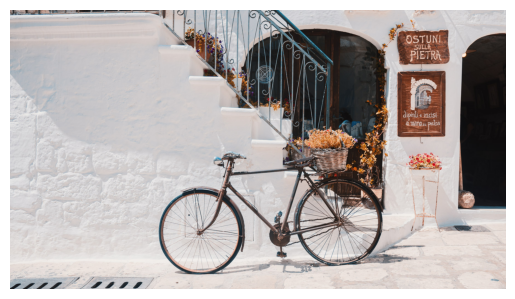

(1013, 1800, 3)
uint8


In [2]:
def imshow(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
bike = cv.imread('bike.jpg',cv.IMREAD_COLOR)[:,:,[2,1,0]]
imshow(bike)
print(bike.shape)
print(bike.dtype)

Another package for handling images is `pil` (the Python image library, or PIL).  It mostly focuses on high-level commands, so we won't be using it much.  It does provide an image display function that shows the image at full size, unlike the scaled version we got above.  Occasionally it may be useful to see this level of detail.

In [3]:
bike_pil = Image.fromarray(bike)
bike_pil.show()

Since the image is stored as an array, we can easily crop it to an area of particular interest by indexing into the array.  Numpy provides convenient notation for selecting a range of indices.  We can even scale down the image by skipping over indices.  Each dimension can be indexed by a start and stop index that define the desired range, separated by a colon.  An optional third number defines a step size, allowing you to skip by a regular amount between selections.

The displayed version won't look any different since it gets automatically scaled down anyway, but if you look carefully at the array dimensions you will see that it has only half the number of rows and columns as the original -- so it has just one quarter the number of pixels!

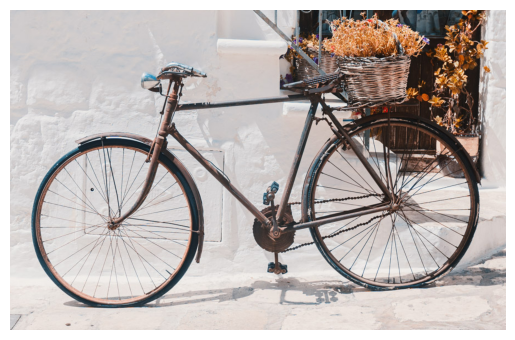

(580, 899, 3)


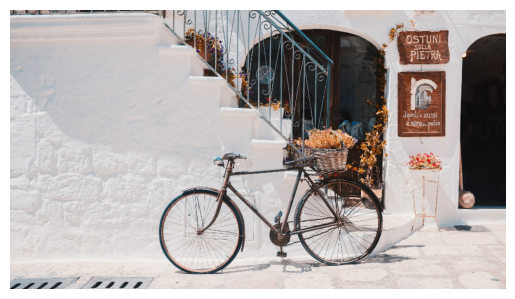

(507, 900, 3)


In [4]:
bike_crop = bike[420:1000,501:1400]
imshow(bike_crop)
print(bike_crop.shape)
bike_half = bike[0::2,0::2]
imshow(bike_half)
print(bike_half.shape)

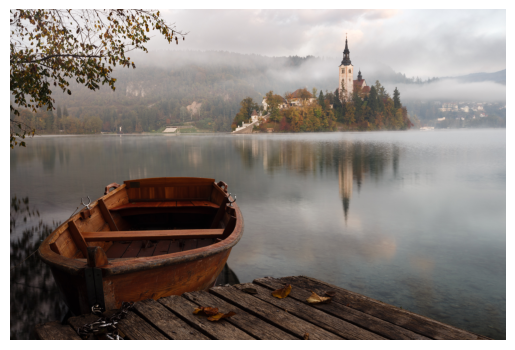

(3534, 5301, 3)
uint8
0 255


In [5]:
boat = cv.imread('rowboat.jpg',cv.IMREAD_COLOR)[:,:,[2,1,0]]
imshow(boat)
print(boat.shape)
print(boat.dtype)
print(boat.min(),boat.max())

Now it's your turn to try out some of this indexing magic for yourself.

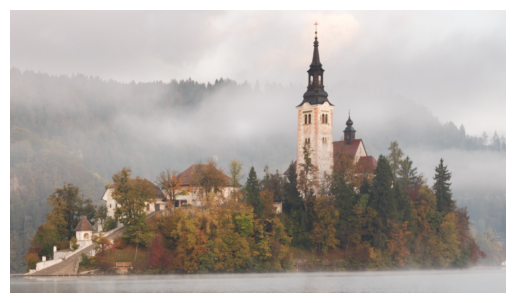

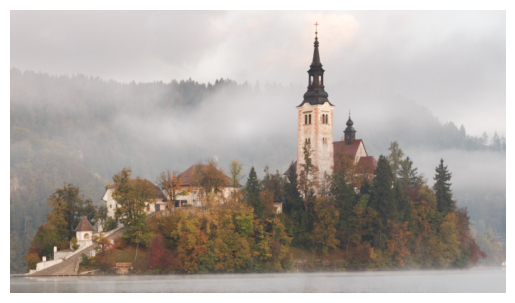

In [21]:
# TO DO:  Crop the image to display just the island with the castle.  
imshow(boat[200:1400,2300:4400])

# TO DO:  Display the same region, but only show every third pixel in each dimension.
imshow(boat[200:1400:3,2300:4400:3])

Unsigned 8-bit integers are fine for storage of images, but if we want to perform computations on them it will be useful to use a floating point representation instead.  (Recall that floating point is the usual type employed for fractional numbers.)  It is also typical to scale the floating point values differently.  Instead of a maximum value of 255, the pixels in a floating point representation range between 0.0 and 1.0.  Thus when we convert from one representation to the other we need to divide (or multiply) by 255.

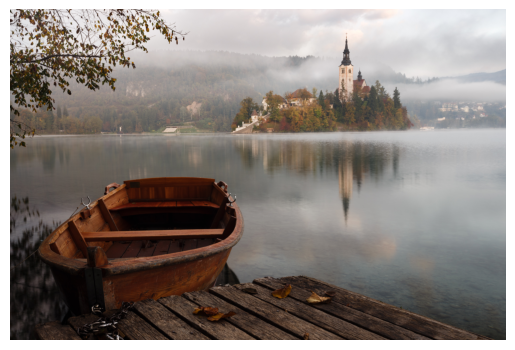

float32
0.0 1.0


In [7]:
boat = boat.astype(np.float32)/255.0
imshow(boat)
print(boat.dtype)
print(boat.min(),boat.max())

PIL only works with `uint8`, so we would need to remember to perform an appropriate conversion back before using that package.

In [8]:
boat_pil = Image.fromarray((boat*255).astype(np.uint8))
boat_pil.show()

### Part Two:  Color Planes

You may have noticed that the arrays we have worked with so far have a third dimension that is always 3.  Color images are typically represented as some proportional mixture of red, green, and blue at each pixel.  The third array dimension is used to store these three color components for each pixel.  Of course, if we slice the array differently then we can isolate slices representing the red, green and blue components across the entire image.  

We can view these color planes independently.  Without their mates, each one will appear as a grayscale image of varying intensity.  Do they look as you would have expected?  Look closely at the relative strengths of each component where they mix to form different colors of the boy's shirt.  Most shades that are not pure black have some amount of all three components; a color will be perceived when one (or more) components slightly outweighs the others.

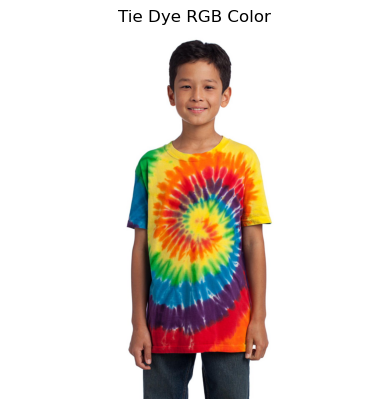

(2000, 2000, 3)


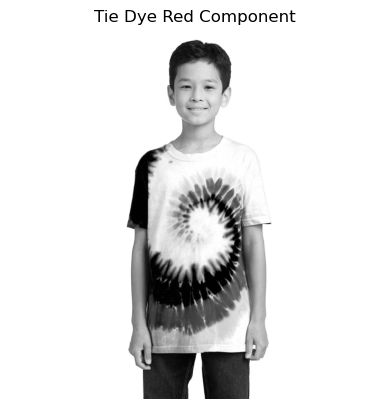

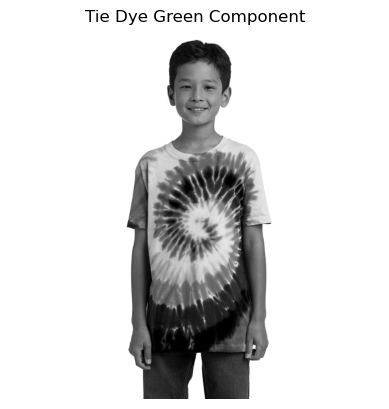

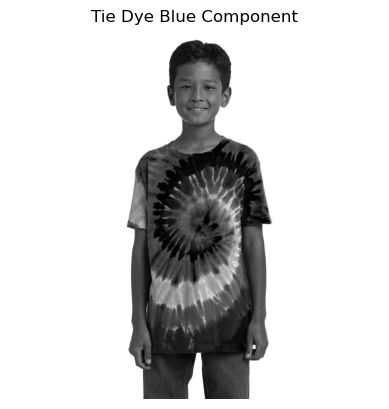

In [9]:
tee = cv.imread('tie_dye.jpg',cv.IMREAD_COLOR)[:,:,[2,1,0]]
plt.title('Tie Dye RGB Color')
imshow(tee)
print(tee.shape)
color = ('Red','Green','Blue')  # we changed order from cv default
for i,col in enumerate(color):
    plt.title('Tie Dye '+col+" Component")
    imshow(tee[:,:,i])

Normally, each color plane stays where it is.  We can get an interesting effect if we swap them around.  (This usually happens by accident rather than on purpose.)  It's also worth looking at as an example of another way to index NumPy arrays:  you can provide a second array containing indices along one or more of the dimensions.  This array can have any or all of the valid indices of that dimension, and can even skip or duplicate elements.  The result is a new array containing the selected slices of the original.

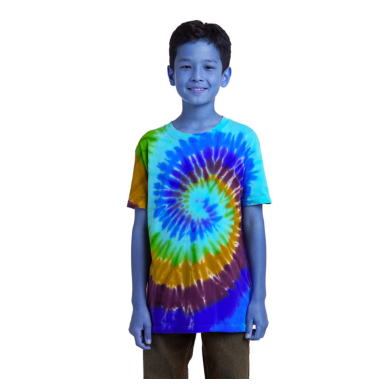

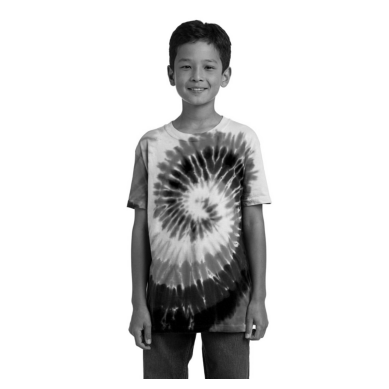

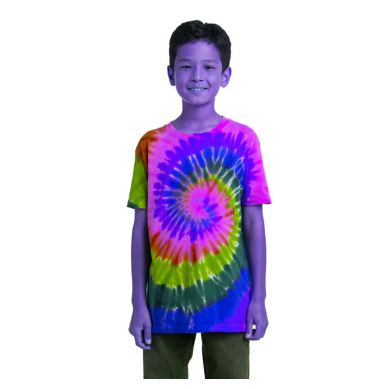

In [25]:
imshow(tee[:,:,[2,1,0]])  # reorder color from RGB to BGR
imshow(tee[:,:,[1,1,1]])  # repeat the green plane three times

# TODO:  Display the tie die shirt with the colors rearranged to a new order.
# Can you predict in advance what it will look like?
imshow(tee[:,:,[1,2,0]])  # other orders are possible

### Part Three:  Histograms

One way to understand the colors and shades in an image is to look at counts of the number of pixels at each individual color value.  We can represent this as a histogram or bar graph.  The OpenCV library provides a function to perform the count for us, although we could also write our own.  Here we are lumping all three color components of an image into a single chart.

In [10]:
boat_hist = cv.calcHist([boat],[0],None,[256],[0.0,1.0])  # float32 image values are scaled 0-1
bike_hist = cv.calcHist([bike],[0],None,[256],[0,256])    # uint8 image values are scaled 0-255
print(boat_hist.shape)
print(bike_hist.shape)

(256, 1)
(256, 1)


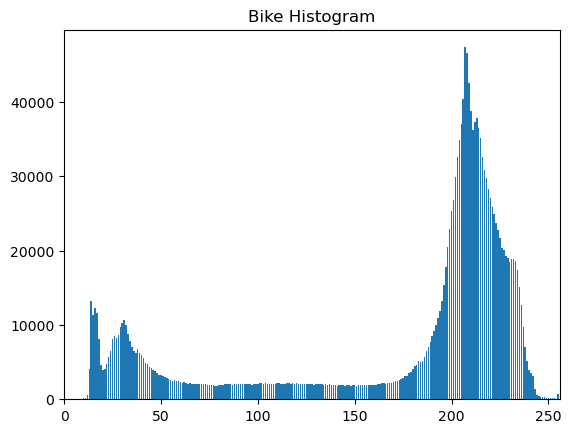

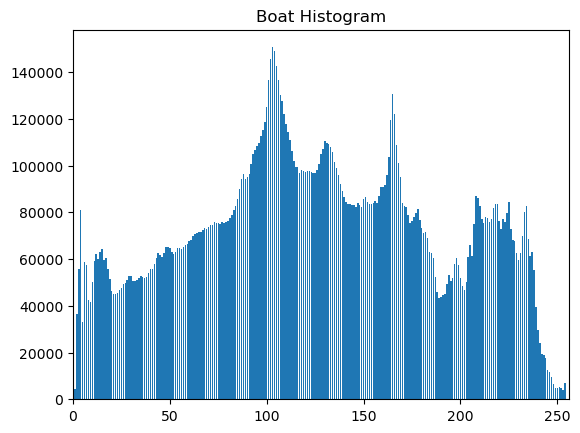

In [11]:
def show_hist(hist,title=''):
    plt.bar(range(0,256),hist.ravel())
    plt.xlim([0,256])
    plt.title(title)
    plt.show()
    
show_hist(bike_hist,'Bike Histogram')
show_hist(boat_hist,'Boat Histogram')

We can also compute and display separate histograms for each individual color component.  Although there are subtle differences, they are more similar to each other than different.  (Is that surprising?)

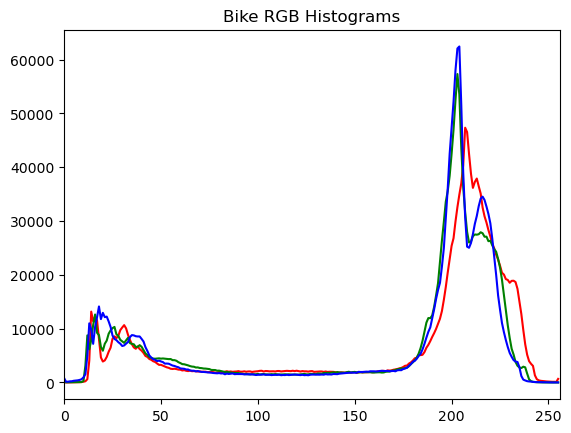

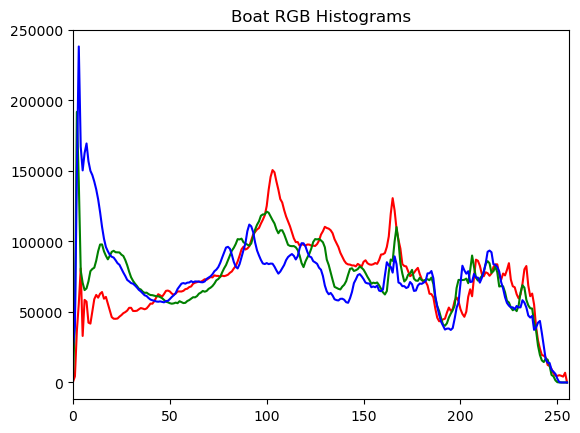

In [12]:
def topval(img):
    if img.dtype=='uint8':
        return 256
    else:
        return 1.0   
            
def rgb_hist(img,title=''):
    color = ('r','g','b')  # we changed order from cv default
    for i,col in enumerate(color):    
        histr = cv.calcHist([img],[i],None,[256],[0,topval(img)])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title(title)
    plt.show()
    
rgb_hist(bike,'Bike RGB Histograms')
rgb_hist(boat,'Boat RGB Histograms')

Looking at the histograms provides one way to understand what is happening when we transform the image in one way or another.  Below we experiment with two different methods for lightening or darkening an image.  Just looking at the resulting image itself does not necessarily reveal what has happened, but looking at the histograms makes it much more clear.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


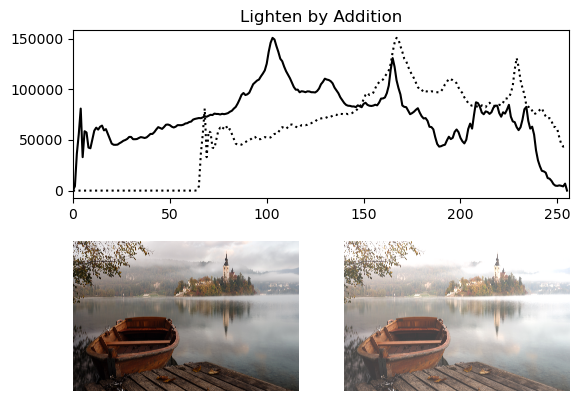

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


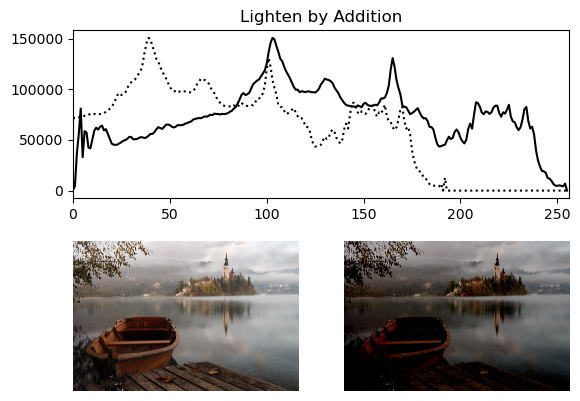

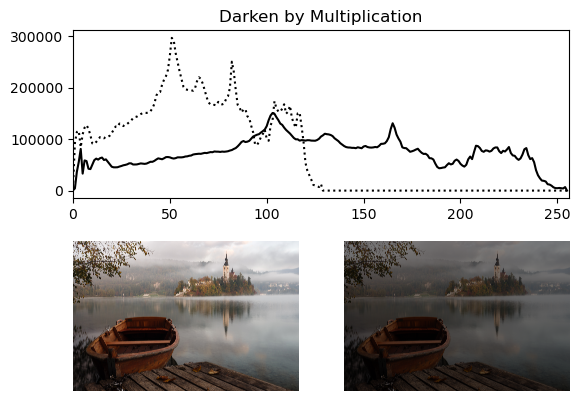

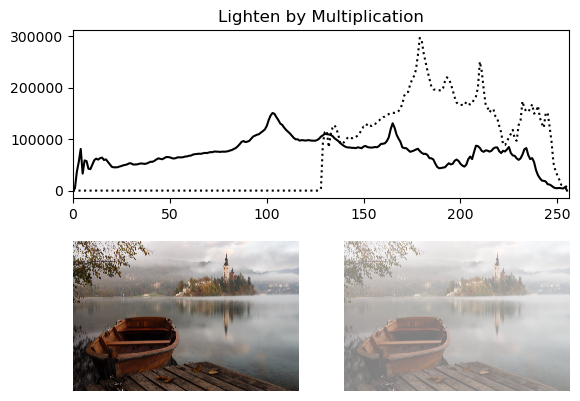

In [13]:
def compare_hist(im1,im2,title=''):
    plt.subplot(2,1,1)
    hist1 = cv.calcHist([im1],[0],None,[256],[0,topval(im1)])
    plt.plot(hist1,'k-')
    hist2 = cv.calcHist([im2],[0],None,[256],[0,topval(im2)])
    plt.plot(hist2,'k:')
    plt.xlim([0,256])
    plt.title(title)
    plt.subplot(2,2,3)
    plt.imshow(im1)
    plt.axis('off')
    plt.subplot(2,2,4)
    plt.imshow(im2)
    plt.axis('off')
    plt.show()
    
compare_hist(boat,boat+0.25,'Lighten by Addition')  # values above 1.0 will be clipped & lost
compare_hist(boat,boat-0.25,'Lighten by Addition')  # values below 0.0 will be clipped & lost
compare_hist(boat,boat/2,'Darken by Multiplication')
compare_hist(boat,boat/2+0.5,'Lighten by Multiplication')

When we add or subtract a constant value, it shifts the entire histogram right or left.  Some of the pixels will end up outside the valid range with this type of move.  When we multiply by a fraction, we shrink the histogram pattern so that it spreads over a smaller range of intensities.

### Part Four:  Your Turn

Now it is your turn to try some of these techniques out for yourself.  Find an image you'd like to work with, either one you have taken or something from a site offering free photographs.

Write code in the cell below to load your image into memory and display it.  Next, pick some detail in the image and create a cropped version that focuses on it.  Display that as well.

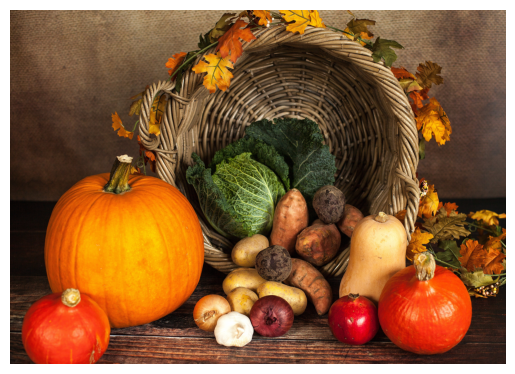

(3315, 4641, 3)


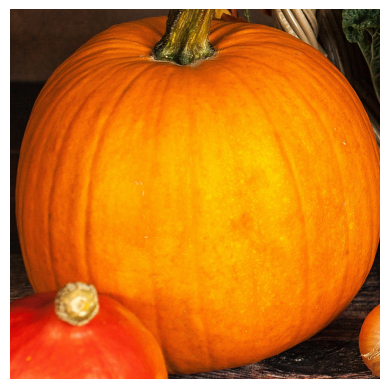

In [32]:
harvest = cv.imread('harvest.jpg',cv.IMREAD_COLOR)[:,:,[2,1,0]].astype(np.float32)/255.0
imshow(harvest)
print(harvest.shape)
imshow(harvest[1500:3000,300:1800])

Create and display a histogram of the pixel values for your image.  Next, create two new histograms with 250 and 260 bins, respectively.  Display them in comparison with the first histogram you made.  Do you notice anything unexpected or unusual?  What might explain these observations?

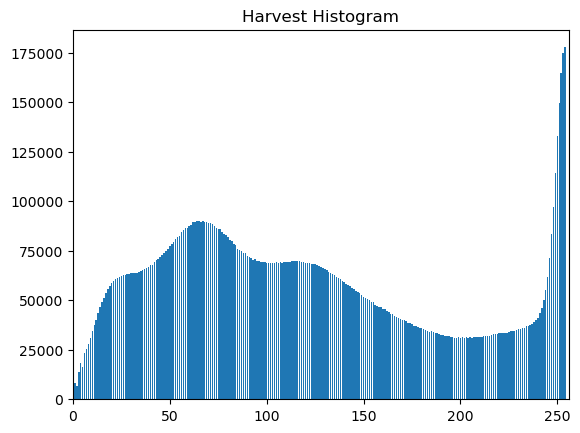

In [34]:
harv_hist = cv.calcHist([harvest],[0],None,[256],[0.0,1.0])
show_hist(harv_hist,"Harvest Histogram")

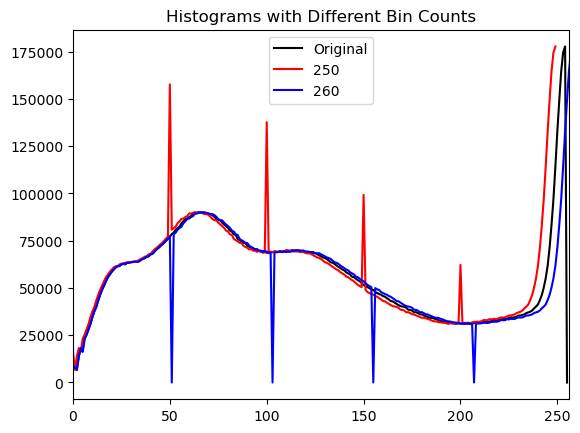

In [38]:
hist250 = cv.calcHist([harvest],[0],None,[250],[0.0,1.0])
hist260 = cv.calcHist([harvest],[0],None,[260],[0.0,1.0])
plt.plot(harv_hist,'k-')
plt.plot(hist250,'r-')
plt.plot(hist260,'b-')
plt.xlim([0,256])
plt.legend(("Original","250","260"))
plt.title("Histograms with Different Bin Counts")
plt.show()

In [ ]:
# The 250-bin histogram has several bins that combine two pixel values, causing spikes.
# The 260-bin histogram has several bins that fall between pixel values, and are empty.

Next, apply some overall transformation to the pixel values (something similar to the examples above but not exactly the same).  Check how the histogram is altered by your operation.  Are the results as you expected?

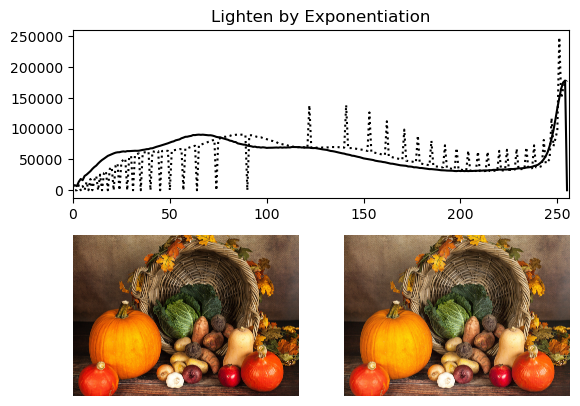

In [40]:
compare_hist(harvest,harvest**0.8,"Lighten by Exponentiation")

In [ ]:
# This method shifts the histogram to the right, 
# but it also causes empty bins on the left and doubled bins on the right.

Compare the two methods shown earlier for lightening and darkening images.  What do you see as the strengths of one over the other?  Can you propose any alternatives that you think might be preferable?  Experiment with different possibilities.

In [ ]:
# This is an aesthetic judgment.
# One disadvantage of the addition method is the saturation of very light or dark values.
# On the other hand, the multiplication method compresses the range of intensities.